In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns 

In [4]:
mpg_data = pd.read_csv('/Users/joseservin/DataCamp/Courses/Intro_Seaborn/mpg.csv')

In [5]:
mpg_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [6]:
mpg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


# Seaborn introduction

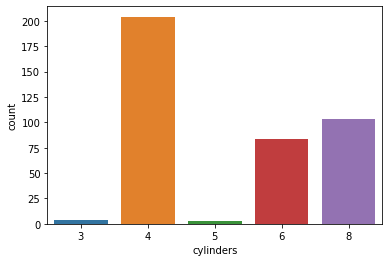

In [7]:
sns.countplot(x='cylinders', data=mpg_data)
plt.show()

## Adding a third variable with hue

In [11]:
# introduce tips dataset from seaborn module 
tips = pd.read_csv('/Users/joseservin/DataCamp/Courses/Intro_Seaborn/tips.csv')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Exploring relationship between total bill and tip 

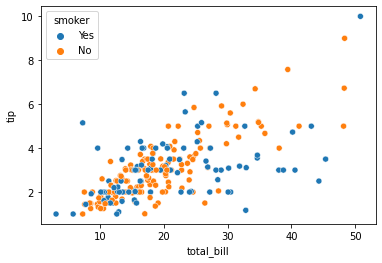

In [21]:
sns.scatterplot(
    x='total_bill',
    y='tip',
    data=tips,
    hue='smoker',
    hue_order=['Yes','No']
) # showing a third variable as the hue
plt.show()

## Matplotlib.pyplot review

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


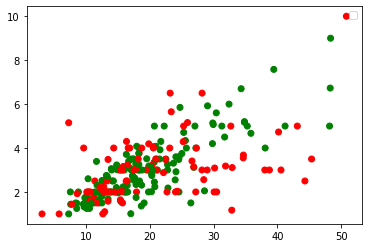

In [22]:
def plotcolors(list):
    cols = []
    for i in list:
        if i == 'Yes':
            cols.append('Red')
        elif i == 'No':
            cols.append('Green')
    return cols

colors = plotcolors(tips['smoker'])

fig, ax = plt.subplots()

ax.scatter(tips['total_bill'], tips['tip'], c=colors)
ax.legend()
plt.show()

In [23]:
non_smoker = tips.query('smoker == "No"')
non_smoker.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [24]:
smoker = tips.query('smoker == "Yes"')

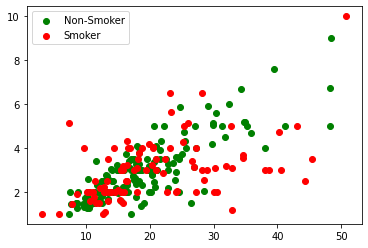

In [26]:
fig, ax = plt.subplots()

ax.scatter(non_smoker['total_bill'], non_smoker['tip'], label='Non-Smoker', color='g')
ax.scatter(smoker['total_bill'], smoker['tip'], label='Smoker', color='red')


plt.legend()

plt.show()

## Specify the hue colors

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


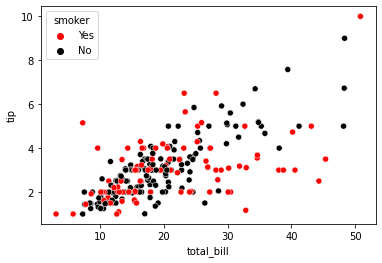

In [32]:
hue_colors = {'Yes':'Red', 'No':'Black'}

sns.scatterplot(
    'total_bill',
    'tip',
    data=tips,
    hue='smoker',
    palette = hue_colors,
    hue_order = ['Yes','No']
)

plt.show()

## HTML hue colors

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


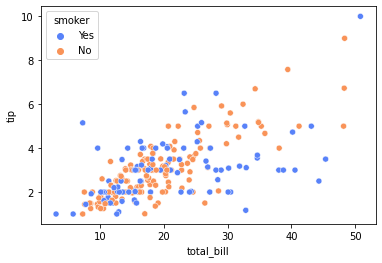

In [33]:
hue_colors = {'Yes':'#5882F9', 'No':'#F99358'}

sns.scatterplot(
    'total_bill',
    'tip',
    data=tips,
    hue='smoker',
    palette = hue_colors,
    hue_order = ['Yes','No']
)

plt.show()

## Using hue to plot number of smokers categorized by sex

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


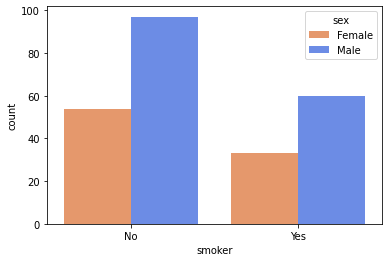

In [39]:
hue_colors = {'Male':'#5882F9', 'Female':'#F99358'}

sns.countplot(
    'smoker',
    data=tips,
    hue='sex',
    palette = hue_colors
)

plt.show()

# Intro to relational plots and subplots 

 relplot() lets you create subplots in a single figure; allowing you to compare two or more quantitative variables

## creating subplots in column dimension

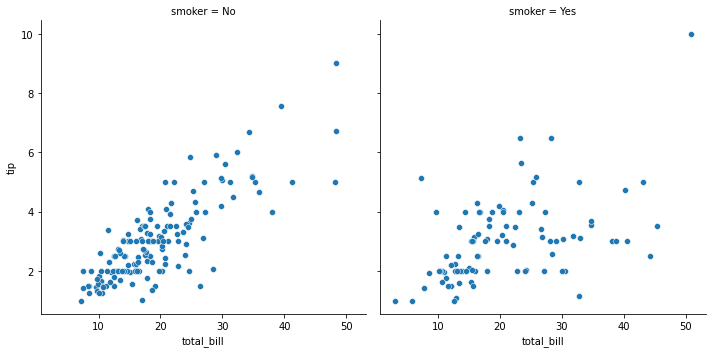

In [43]:
sns.relplot(x='total_bill', y='tip', data=tips, kind='scatter', col='smoker')
plt.show()

## creating subplots in row dimension

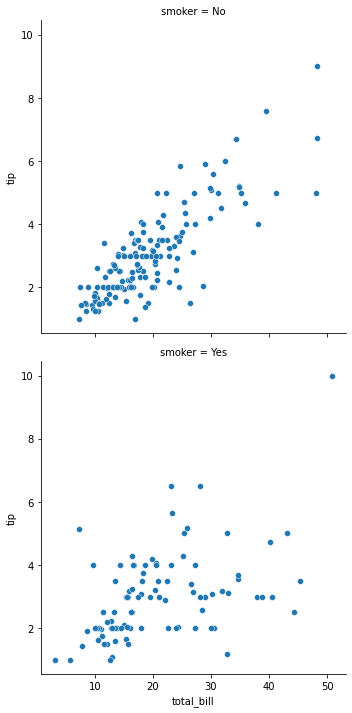

In [44]:
sns.relplot(x='total_bill', y='tip', data=tips, kind='scatter', row='smoker')
plt.show()

## Matplotlib.pyplot review

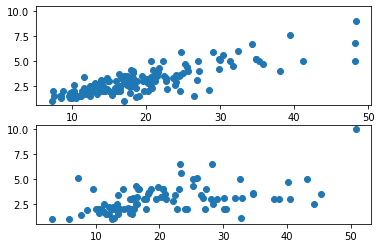

In [46]:
fig, ax = plt.subplots(2,1, sharey=True)

ax[0].scatter(non_smoker['total_bill'], non_smoker['tip'])
ax[1].scatter(smoker['total_bill'], smoker['tip'])

plt.show()

## creating subplots using both row x column

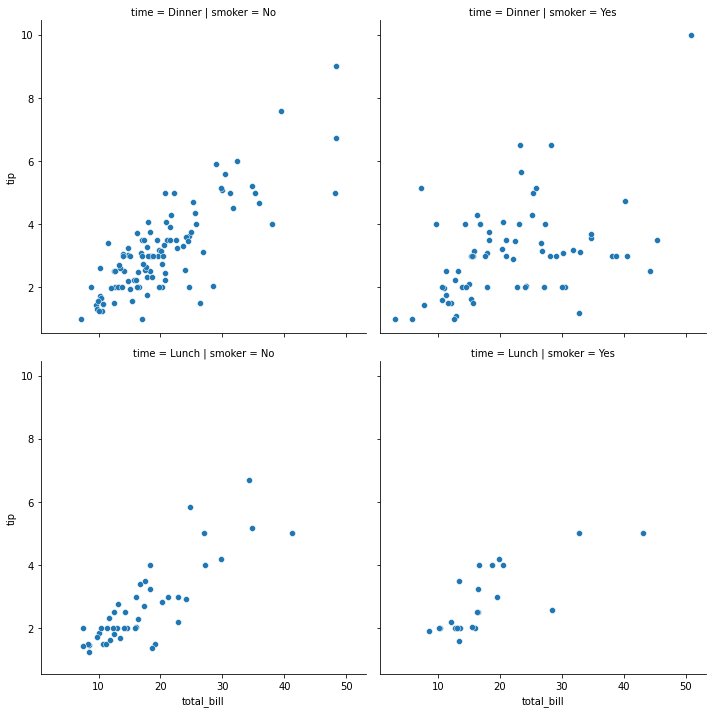

In [47]:
sns.relplot(
    x='total_bill',
    y='tip', data=tips,
    kind='scatter',
    col='smoker',
    row ='time'
)
plt.show()

## wrapping columns

In [48]:
tips.day.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

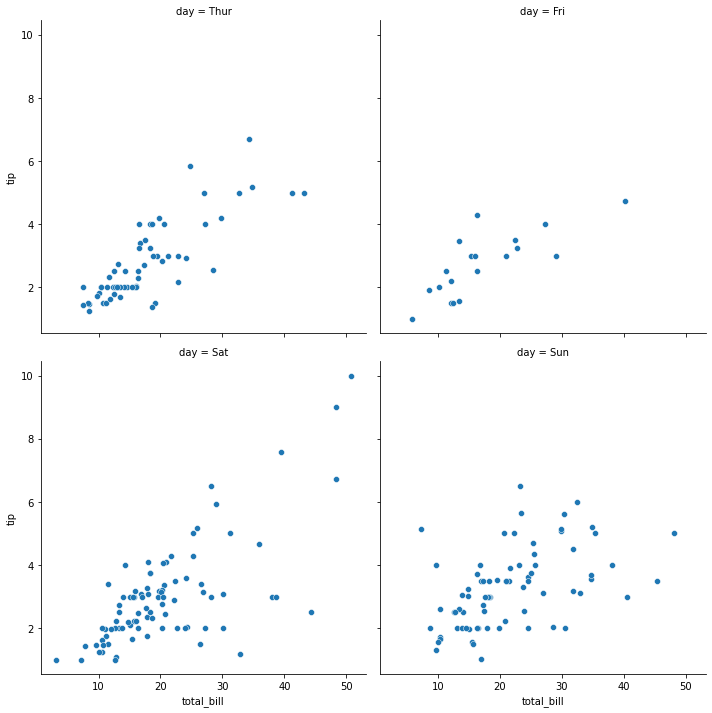

In [51]:
sns.relplot(
    x='total_bill',
    y='tip', data=tips, 
    kind='scatter',
    col='day',
    col_wrap = 2, # this determines how many plots in a row 
    col_order = ['Thur','Fri','Sat','Sun'] # This determines plot order based off the col argument values
)
plt.show()

# Customizing scatter plots